In [1]:
from caveclient import CAVEclient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from requests.exceptions import HTTPError

In [2]:
# Versions: 117 and 343 and 661
client = CAVEclient('minnie65_public_v343')

In [3]:
client.materialize.get_tables()

['synapses_pni_2',
 'nucleus_neuron_svm',
 'nucleus_detection_v0',
 'functional_coreg',
 'allen_v1_column_types_slanted',
 'aibs_column_nonneuronal',
 'func_unit_em_match_release',
 'proofreading_status_public_release',
 'aibs_soma_nuc_metamodel_preds_v117']

In [4]:
# Query for all the excitatory cells individually and save to csv
ct_df = pd.read_csv('data/exc_cells.csv')

In [22]:
cell_ids = list(ct_df['pt_root_id'].unique())
num_chunks = 100
start_chunk = 98  # Correct and up to date
do_first = True
chunk_size = len(cell_ids) // num_chunks

# Query for all synapses between excitatory cells in chunks of chunk_size
for i in range(start_chunk,num_chunks):
    if i == num_chunks - 1:
        chunk = cell_ids[i*chunk_size:]
    else:
        chunk = cell_ids[i*chunk_size:(i+1)*chunk_size]
    
    if do_first:
        try:
            print(f'Chunk {i}.1 of {num_chunks}')
            syn_df_1 = client.materialize.query_table('synapses_pni_2',
                                                    filter_in_dict = {'pre_pt_root_id': cell_ids,
                                                                    'post_pt_root_id': chunk[:len(chunk)//2]},
                                                    select_columns=['pre_pt_root_id', 'post_pt_root_id', 'ctr_pt_position', 'size'])
            print(syn_df_1.shape)
            syn_df_1.to_csv(f'syn_data/synapses_{i}.csv')
        except HTTPError:
            print(f'Chunk {i}.1.1 of {num_chunks}')
            syn_df_1i = client.materialize.query_table('synapses_pni_2',
                                                    filter_in_dict = {'pre_pt_root_id': cell_ids,
                                                                    'post_pt_root_id': chunk[:len(chunk)//4]},
                                                    select_columns=['pre_pt_root_id', 'post_pt_root_id', 'ctr_pt_position', 'size'])
            print(f'Chunk {i}.1.2 of {num_chunks}')
            syn_df_1j = client.materialize.query_table('synapses_pni_2',
                                                    filter_in_dict = {'pre_pt_root_id': cell_ids,
                                                                    'post_pt_root_id': chunk[len(chunk)//4:len(chunk)//2]},
                                                    select_columns=['pre_pt_root_id', 'post_pt_root_id', 'ctr_pt_position', 'size'])
            syn_df_1 = pd.concat([syn_df_1i, syn_df_1j])
            print(syn_df_1.shape)
            syn_df_1.to_csv(f'syn_data/synapses_{i}.csv')

    try:
        print(f'Chunk {i}.2 of {num_chunks}')
        syn_df_2 = client.materialize.query_table('synapses_pni_2',
                                                filter_in_dict = {'pre_pt_root_id': cell_ids,
                                                                'post_pt_root_id': chunk[len(chunk)//2:]},
                                                select_columns=['pre_pt_root_id', 'post_pt_root_id', 'ctr_pt_position', 'size'])
        print(syn_df_2.shape)
        syn_df_2.to_csv(f'syn_data/synapses_{i + 100}.csv')
    except HTTPError:
        print(f'Chunk {i}.2.1 of {num_chunks}')
        syn_df_2i = client.materialize.query_table('synapses_pni_2',
                                                filter_in_dict = {'pre_pt_root_id': cell_ids,
                                                                'post_pt_root_id': chunk[len(chunk)//2:3*len(chunk)//4]},
                                                select_columns=['pre_pt_root_id', 'post_pt_root_id', 'ctr_pt_position', 'size'])
        print(f'Chunk {i}.2.2 of {num_chunks}')
        syn_df_2j = client.materialize.query_table('synapses_pni_2',
                                                filter_in_dict = {'pre_pt_root_id': cell_ids,
                                                                'post_pt_root_id': chunk[3*len(chunk)//4:]},
                                                select_columns=['pre_pt_root_id', 'post_pt_root_id', 'ctr_pt_position', 'size'])
        syn_df_2 = pd.concat([syn_df_2i, syn_df_2j])
        print(syn_df_2.shape)
        syn_df_2.to_csv(f'syn_data/synapses_{100+i}.csv')

Chunk 98.1 of 100
(47841, 4)
Chunk 98.2 of 100
(40022, 4)
Chunk 99.1 of 100
(37135, 4)
Chunk 99.2 of 100
(37787, 4)


In [21]:
chunk_num = 39
chunk1 = cell_ids[chunk_num*chunk_size:int((chunk_num+0.5)*chunk_size)]
chunk2 = cell_ids[int((chunk_num+0.5)*chunk_size):(chunk_num+1)*chunk_size]

print(f'Chunk {chunk_num}.1 of {num_chunks}')
syn_df = client.materialize.query_table('synapses_pni_2',
                                        filter_in_dict = {'pre_pt_root_id': cell_ids[:len(cell_ids)//2],
                                                            'post_pt_root_id': chunk1},
                                        select_columns=['pre_pt_root_id', 'post_pt_root_id', 'ctr_pt_position', 'size'])
print(syn_df.shape)
syn_df.to_csv(f'syn_data/synapses_103.csv')

print(f'Chunk {chunk_num}.1.5 of {num_chunks}')
syn_df = client.materialize.query_table('synapses_pni_2',
                                        filter_in_dict = {'pre_pt_root_id': cell_ids[len(cell_ids)//2:],
                                                            'post_pt_root_id': chunk1},
                                        select_columns=['pre_pt_root_id', 'post_pt_root_id', 'ctr_pt_position', 'size'])
print(syn_df.shape)
syn_df.to_csv(f'syn_data/synapses_104.csv')

print(f'Chunk {chunk_num}.2 of {num_chunks}')
syn_df = client.materialize.query_table('synapses_pni_2',
                                        filter_in_dict = {'pre_pt_root_id': cell_ids[:len(cell_ids)//2],
                                                            'post_pt_root_id': chunk2},
                                        select_columns=['pre_pt_root_id', 'post_pt_root_id', 'ctr_pt_position', 'size'])
print(syn_df.shape)
syn_df.to_csv(f'syn_data/synapses_{chunk_num}.csv')

print(f'Chunk {chunk_num}.2.5 of {num_chunks}')
syn_df = client.materialize.query_table('synapses_pni_2',
                                        filter_in_dict = {'pre_pt_root_id': cell_ids[len(cell_ids)//2:],
                                                            'post_pt_root_id': chunk2},
                                        select_columns=['pre_pt_root_id', 'post_pt_root_id', 'ctr_pt_position', 'size'])
print(syn_df.shape)
syn_df.to_csv(f'syn_data/synapses_{chunk_num+100}.csv')

Chunk 39.1 of 100
(20315, 4)
Chunk 39.1.5 of 100
(4841, 4)
Chunk 39.2 of 100
(25041, 4)
Chunk 39.2.5 of 100
(8476, 4)


In [ ]:
# input_synapses = pd.read_csv('input_synapses.csv')
# cells_df = pd.read_csv('celltypes.csv')
# cell_ids = list(cells_df['pt_root_id'].unique())

# displacements = []

# for cell_id in cell_ids:
#     # Get all the input synapses for cell_id
#     cell_inputs = input_synapses.loc[input_synapses['post_pt_root_id'] == cell_id]

#     # Get the pre_pt_root_id for each input synapse
#     pre_ids = list(cell_inputs['pre_pt_root_id'].unique())

#     # Get the soma position for each pre_pt_root_id
#     pre_soma_positions = np.asarray(ct_df.loc[ct_df['pt_root_id'].isin(pre_ids)]['pt_position'])

#     # Get the soma position for the cell_id as an array
#     cell_soma_position = ct_df.loc[ct_df['pt_root_id'] == cell_id]['pt_position']
#     cell_soma_position = np.asarray(cell_soma_position)[0]
#     cell_soma_position = np.fromstring(cell_soma_position[1:-1], dtype=int, sep=' ')

#     for pre_soma_position in pre_soma_positions:
#         pre_soma_position = np.fromstring(pre_soma_position[1:-1], dtype=int, sep=' ')
#         displacements.append(pre_soma_position - cell_soma_position)

# displacements = np.asarray(displacements)
# diag = np.diag([4, 4, 40])
# displacements = np.matmul(displacements, diag)

In [ ]:
# # Convert displacements to pandas dataframe and save as csv
# displacements_df = pd.DataFrame(displacements)
# displacements_df.to_csv('ex-ex_post-cent_disp.csv')

/var/folders/00/x675wrkn78qd6yxs77mmkrh00000gn/T/ipykernel_18308/1116915781.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


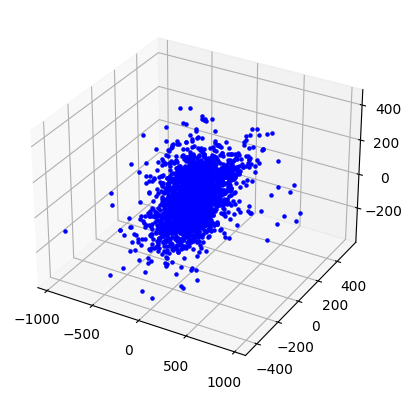

In [ ]:
# fig = plt.figure()
# ax = fig.gca(projection='3d')

# for vec in displacements:
#     ax.scatter(vec[0] / 1000, vec[1] / 1000, vec[2] / 1000, zdir='z', s=5, c='b')

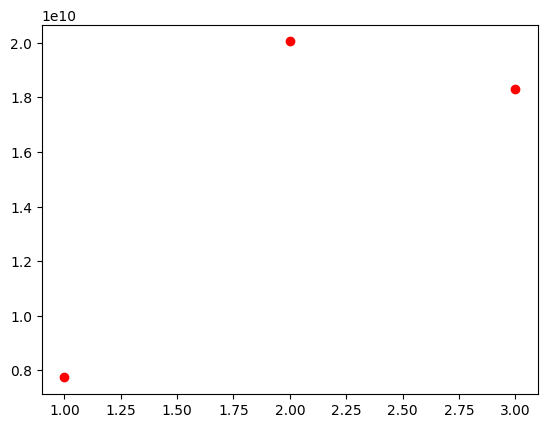

In [ ]:
# cov_matrix = np.cov(displacements.T)
# eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
# plt.plot([1, 2, 3], eigenvalues, 'ro')